# Explore here

In [33]:
# Your code here
import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')

df


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [35]:
df_st = df[['Date','Hydrometry_Nave_di_Rosano']]
df_st['Date'] = pd.to_datetime(df_st['Date'],format="%d/%m/%Y").dt.date
df_st = df_st.set_index('Date')

df_st

/tmp/ipykernel_567/1881246699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_st['Date'] = pd.to_datetime(df_st['Date'],format="%d/%m/%Y").dt.date


,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


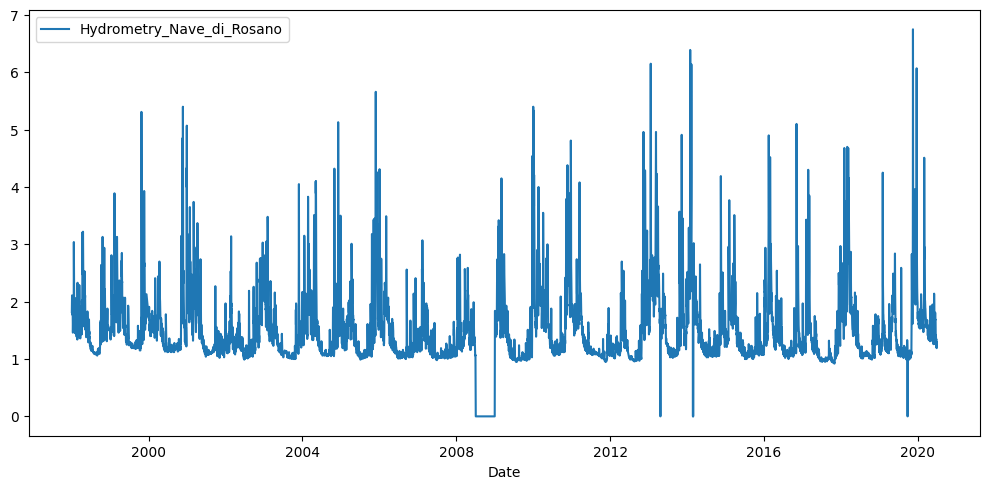

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
plt.tight_layout()
plt.show()

In [37]:
df_st.dropna(inplace=True)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomposion = seasonal_decompose(df_st,period=365)

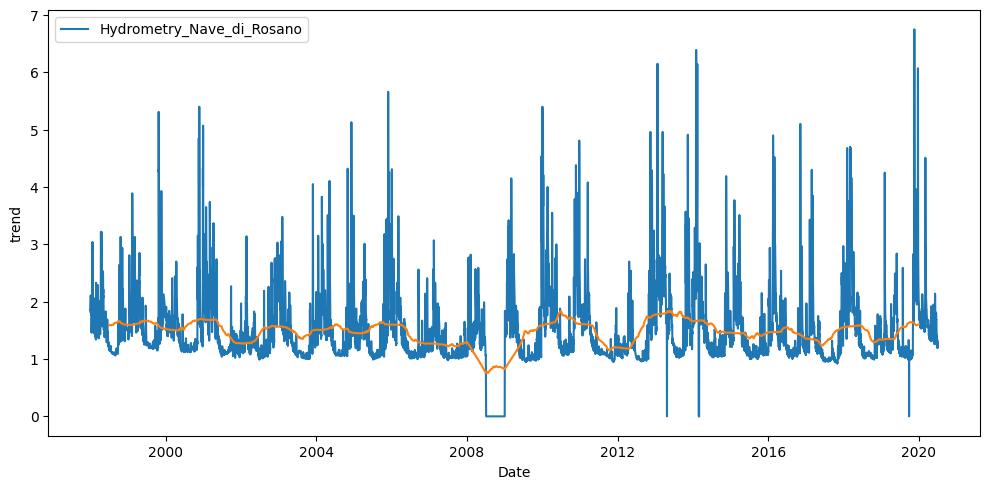

In [39]:
trend = descomposion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=trend)
plt.tight_layout()
plt.show()

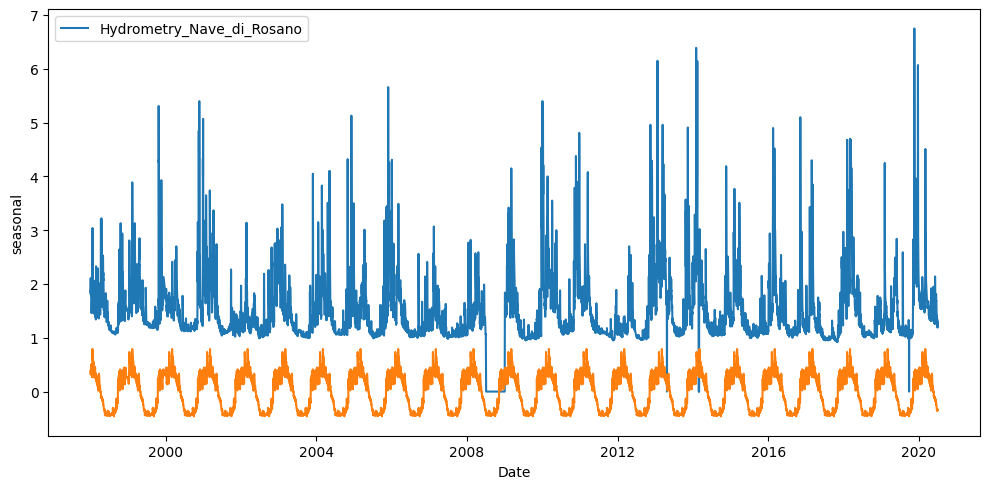

In [40]:
estacionalidad = descomposion.seasonal

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=estacionalidad)
plt.tight_layout()
plt.show()

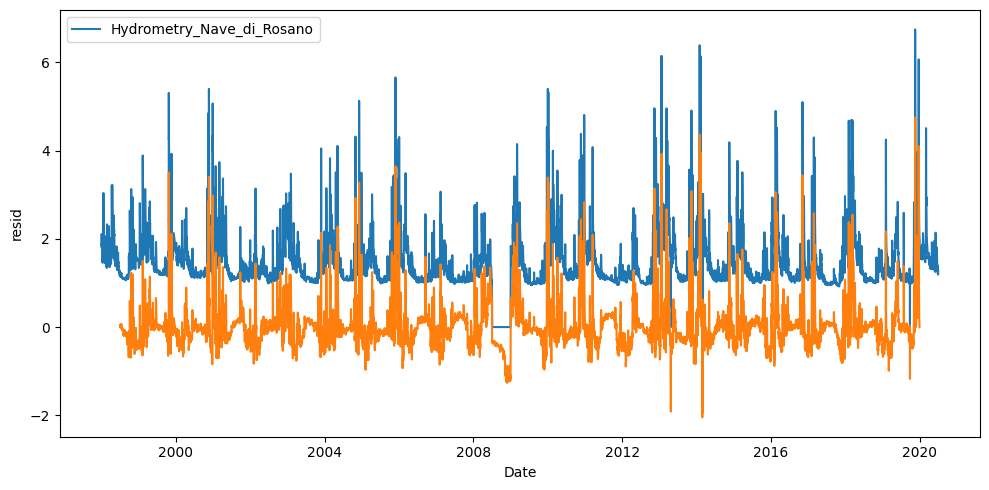

In [41]:
resid = descomposion.resid

plt.subplots(figsize=(10,5))
sns.lineplot(data=df_st)
sns.lineplot(data=resid)
plt.tight_layout()
plt.show()

In [42]:
df_train = df_st[df_st.index<pd.to_datetime('2020-06-01').date()]
df_test = df_st[df_st.index>=pd.to_datetime('2020-06-01').date()]

In [43]:
from pmdarima import auto_arima

model = auto_arima(df_train,seasonal=True,trace=True,m=30)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=2166.976, Time=49.48 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2961.741, Time=0.34 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2963.034, Time=4.94 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2961.765, Time=5.30 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2959.741, Time=0.15 sec
 ARIMA(2,1,2)(0,0,1)[30] intercept   : AIC=2164.978, Time=46.26 sec
 ARIMA(2,1,2)(0,0,0)[30] intercept   : AIC=2163.817, Time=2.95 sec
 ARIMA(2,1,2)(1,0,0)[30] intercept   : AIC=2164.995, Time=42.98 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=2162.058, Time=1.57 sec
 ARIMA(1,1,2)(1,0,0)[30] intercept   : AIC=2163.214, Time=20.25 sec
 ARIMA(1,1,2)(0,0,1)[30] intercept   : AIC=2163.195, Time=28.15 sec
 ARIMA(1,1,2)(1,0,1)[30] intercept   : AIC=2165.188, Time=28.74 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=2585.625, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=2300.694, Time=1.70 sec
 ARIMA(1,1,3)

In [44]:
forecast = model.predict(30)

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
from statsmodels.tsa.arima.model import ARIMA

model_a = ARIMA(df_train['Hydrometry_Nave_di_Rosano'], order=(3,1,2))
model_fit = model_a.fit()

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
forecast = model.predict(30)

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vscode/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test,forecast)

0.04291557941273023

In [51]:
forecast.index = df_test.index

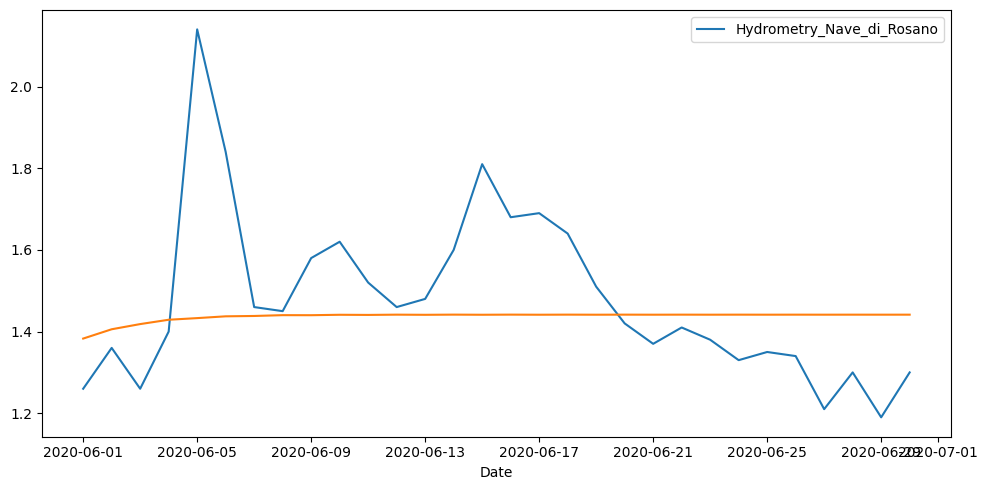

In [52]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=df_test)
sns.lineplot(data=forecast)
plt.tight_layout()
plt.show()